<a href="https://colab.research.google.com/github/DuaneHsa/2022_ML_Earth_Env_Sci/blob/main/final_project_renaud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data is accesible at :  https://github.com/DuaneHsa/2022_ML_Earth_Env_Sci/blob/main/Plume_reno.csv       or      shorturl.at/gprvF


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans as KMeans
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


from yellowbrick.classifier import ClassificationReport
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

from mpl_toolkits.mplot3d import axes3d 

from google.colab import drive


In [ ]:
drive.mount('/content/drive')
!ls /content/drive/
df = pd.read_csv('/content/drive/MyDrive/01_UNIL/00_COURS_UNIL/Machine_Learning/ML_project/Plume_reno.csv',header=0)
pd.set_option('precision', 2)

df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive  Othercomputers


,time,loc,z,pol,conc
0,4,2,-30,Atenolol,7.27
1,4,2,-20,Atenolol,10.88
2,4,2,-15,Atenolol,49.81
3,4,2,-10,Atenolol,117.62
4,4,2,-5,Atenolol,6.09
...,...,...,...,...,...
1017,5,1,-2,Terbutryn,2.73
1018,5,1,-20,Trimethoprim,2.40
1019,5,1,-10,Trimethoprim,2.36
1020,5,1,-5,Trimethoprim,2.53


'\nplt.savefig(\'fig1\',bbox_inches = "tight")\n'

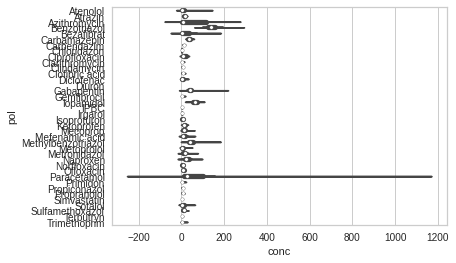

In [ ]:
sns.violinplot('conc','pol', data=df,aspect = 4)

'''
plt.savefig('fig1',bbox_inches = "tight")
'''

In [ ]:
#df1 = df.pivot(index='time', columns='pol', values='conc')
#pol_name = df['pol'].unique() # unique polutant name vector
#pol_name.sort()
#np.wide_to_long(df,['P'], i = ['time','loc','z'], j ='C')  # P is new polutant column,  and C is new concentration column. (but not working...)
#df['time'] = df['time'].astype(str)+ df['loc'].astype(str)
#df['time'] = df['time'].astype(int)
#df.drop('loc', inplace=True, axis=1)
#df = df.groupby((['time','pol']), as_index=False)['conc'].mean()
#(['col5','col2'])
#df['conc'].fillna(0, inplace=True)

In [ ]:
# data arrangement
df['conc'].fillna(0, inplace=True)
df['pol'].replace({'Atenolol': 1, 'Atrazin': 2, 'Azithromycin':3,	'Benzotriazol':4,	'Bezafibrat':5,	'Carbamazepin':6, 'Carbendazim':7,	'Chloridazon':8,	'Ciprofloxacin':9,	'Clarithromycin':10,	'Clindamycin':11,	'Clofibric acid':12, 'Diclofenac':13, 'Diuron':14,	'Gabapentin':15,	'Gemfibrocil':16,	'Iopamidol':17,	'IPBC':18,	'Irgarol':19,	'Isoproturon':20, 'Ketoprofen':21,	'Mecoprop':22,	'Mefenamic acid':23,	'Methylbenzotriazol':24,	'Metoprolol':25,	'Metronidazol':26,	'Naproxen':27,	'Norfloxacin':28,	'Ofloxacin':29,	'Paracetamol':30,	'Primidon':31,'Propiconazol':32,	'Propranolol':33,	'Simvastatin':34,	'Sotalol':35,	'Sulfamethoxazol':36,	'Terbutryn':37,	'Trimethoprim':38}, inplace=True)
df['pol'] = df['pol'].astype(int)
df['conc'] = df['conc'].astype(int)



In [ ]:

#clustering  K-means
km = KMeans(n_clusters=4,init='k-means++',max_iter=1000, random_state=18,algorithm='elkan')
y_predicted = km.fit_predict(df)
df['cluster']=y_predicted
X = df.drop(['conc'], axis=1)
y = df['conc']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 18)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5,random_state = 18)



In [ ]:
'''
#define models and parameters
model = KMeans()
n_clusters = [4,5,6,7,8,9,10]
max_iter = [10, 100,1000,10000]
algorithm = ['auto', 'full', 'elkan']

# grid search
grid = dict(n_clusters = n_clusters,max_iter=max_iter,algorithm=algorithm)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=18)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_val, y_val)
# results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

    '''


'\n#define models and parameters\nmodel = KMeans()\nn_clusters = [4,5,6,7,8,9,10]\nmax_iter = [10, 100,1000,10000]\nalgorithm = [\'auto\', \'full\', \'elkan\']\n\n# grid search\ngrid = dict(n_clusters = n_clusters,max_iter=max_iter,algorithm=algorithm)\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=18)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X_val, y_val)\n# results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n\n    '

In [ ]:
model = km = KMeans(n_clusters=4,init='k-means++',max_iter=1000, random_state=18,algorithm='elkan')


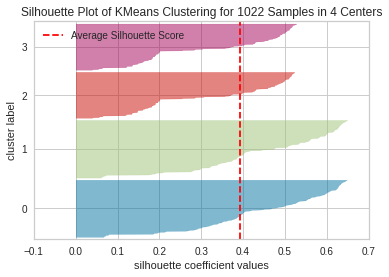

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(4),colors='yellowbrick')
visualizer.fit(X)  
visualizer.show(outpath='fig2.png',bbox_inches = "tight")



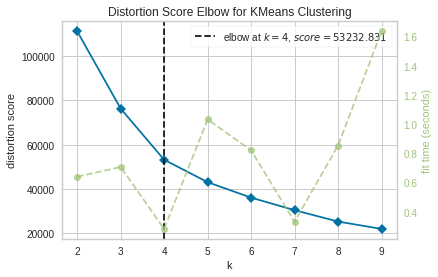

In [ ]:
# number of cluster determination

#model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion',method = 'wcss')
visualizer.fit(X)        # Fit the data to the visualizer

visualizer.show(outpath='fig3.png',bbox_inches = "tight")


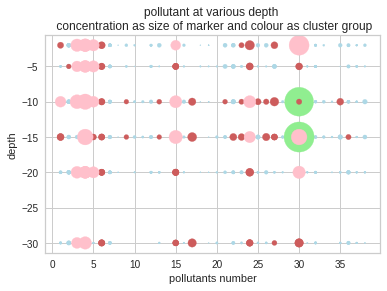

In [ ]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]





plt.scatter(df1.pol,df1.z,df1.conc,color = 'lightblue')
plt.scatter(df2.pol,df2.z,df2.conc,color='lightgreen')
plt.scatter(df3.pol,df3.z,df3.conc,color='indianred')
plt.scatter(df4.pol,df4.z,df4.conc,color='pink')


plt.xlabel('pollutants number')
plt.ylabel('depth')
plt.title('pollutant at various depth \n concentration as size of marker and colour as cluster group')

plt.savefig('fig4',bbox_inches='tight')

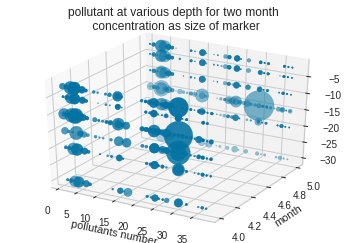

In [ ]:
#print(df)
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
ax.scatter(df.pol,df.time,df.z, s = df.conc)


plt.xlabel('pollutants number')
plt.ylabel('month')


plt.title('pollutant at various depth for two month \n concentration as size of marker')

plt.savefig('fig5',bbox_inches='tight')

In [ ]:
 #DBSCAN part---------

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/01_UNIL/00_COURS_UNIL/Machine_Learning/ML_project/Plume_reno.csv',header=0)


Estimated number of clusters: 13
Estimated number of noise points: 240
Homogeneity: 0.057
Completeness: 0.108
V-measure: 0.074
Adjusted Rand Index: -0.002
Adjusted Mutual Information: -0.001
Silhouette Coefficient: -0.306


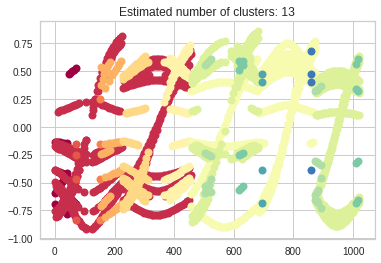

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/01_UNIL/00_COURS_UNIL/Machine_Learning/ML_project/Plume_reno.csv',header=0)
df['conc'].fillna(0, inplace=True)

X = df.drop(['conc',], axis=1)
y = df['conc']

X['pol'].replace({'Atenolol': 1, 'Atrazin': 2, 'Azithromycin':3,	'Benzotriazol':4,	'Bezafibrat':5,	'Carbamazepin':6, 'Carbendazim':7,	'Chloridazon':8,	'Ciprofloxacin':9,	'Clarithromycin':10,	'Clindamycin':11,	'Clofibric acid':12, 'Diclofenac':13, 'Diuron':14,	'Gabapentin':15,	'Gemfibrocil':16,	'Iopamidol':17,	'IPBC':18,	'Irgarol':19,	'Isoproturon':20, 'Ketoprofen':21,	'Mecoprop':22,	'Mefenamic acid':23,	'Methylbenzotriazol':24,	'Metoprolol':25,	'Metronidazol':26,	'Naproxen':27,	'Norfloxacin':28,	'Ofloxacin':29,	'Paracetamol':30,	'Primidon':31,'Propiconazol':32,	'Propranolol':33,	'Simvastatin':34,	'Sotalol':35,	'Sulfamethoxazol':36,	'Terbutryn':37,	'Trimethoprim':38}, inplace=True)
X['pol'] = X['pol'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 18)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5,random_state = 18)

  

# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data s
X_normalized = normalize(X_scaled)
  
#np to panda
X_normalized = pd.DataFrame(X_normalized)

'''
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())
'''

# Numpy array of all the cluster labels assigned to each data point
db= DBSCAN(eps = 50e-3, min_samples = 5,metric= 'euclidean').fit(X_principal)
labels = db.labels_
labels_true = df['pol']

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 0.4]

    class_member_mask = labels == k

    xy = X_normalized[class_member_mask & core_samples_mask]
    plt.plot(
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=8,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.savefig('fig6',bbox_inches='tight')

In [ ]:
'''
#define models and parameters
DBSCAN(eps = 0.09,metric='euclidean',min_samples = 20).fit(X_principal)
  
model = DBSCAN()
eps = [50e-3,60e-3,70e-3,80e-3,90e-3]
metric = ['euclidean']
min_samples = [2,3,4,5,6,7,8,9,10]

# grid search
grid = dict(eps=eps,metric=metric,min_samples=min_samples)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=18)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_val, y_val)
# results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
'''

'\n#define models and parameters\nDBSCAN(eps = 0.09,metric=\'euclidean\',min_samples = 20).fit(X_principal)\n  \nmodel = DBSCAN()\neps = [50e-3,60e-3,70e-3,80e-3,90e-3]\nmetric = [\'euclidean\']\nmin_samples = [2,3,4,5,6,7,8,9,10]\n\n# grid search\ngrid = dict(eps=eps,metric=metric,min_samples=min_samples)\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=18)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X_val, y_val)\n# results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [ ]:
# random forest part-----------------------------

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")



df = pd.read_csv('/content/drive/MyDrive/01_UNIL/00_COURS_UNIL/Machine_Learning/ML_project/Plume_reno.csv',header=0)


pd.set_option('precision', 4)
df['conc'].fillna(0, inplace=True)
df['pol'].replace({'Atenolol': 1, 'Atrazin': 2, 'Azithromycin':3,	'Benzotriazol':4,	'Bezafibrat':5,	'Carbamazepin':6, 'Carbendazim':7,	'Chloridazon':8,	'Ciprofloxacin':9,	'Clarithromycin':10,	'Clindamycin':11,	'Clofibric acid':12, 'Diclofenac':13, 'Diuron':14,	'Gabapentin':15,	'Gemfibrocil':16,	'Iopamidol':17,	'IPBC':18,	'Irgarol':19,	'Isoproturon':20, 'Ketoprofen':21,	'Mecoprop':22,	'Mefenamic acid':23,	'Methylbenzotriazol':24,	'Metoprolol':25,	'Metronidazol':26,	'Naproxen':27,	'Norfloxacin':28,	'Ofloxacin':29,	'Paracetamol':30,	'Primidon':31,'Propiconazol':32,	'Propranolol':33,	'Simvastatin':34,	'Sotalol':35,	'Sulfamethoxazol':36,	'Terbutryn':37,	'Trimethoprim':38}, inplace=True)
df['pol'] = df['pol'].astype(int)
df['conc'] = df['conc'].astype(int)
df = df.astype(int)

#print(df)
#print(df.dtypes)

In [ ]:
X = df.drop(['conc'], axis=1)
y = df['conc']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4,random_state = 18)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5,random_state = 18)


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_features = 'sqrt',max_depth = 10,min_samples_split=10)

#model training
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

y_pred_valid=clf.predict(X_val)


# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_valid))



Accuracy: 0.5816993464052288
Accuracy: 0.5667752442996743


In [ ]:
'''
#define models and parameters
model = RandomForestClassifier()
n_estimators = [1,10, 100,1000]
max_features = ['sqrt', 'log2']

max_depth = [1,5,10, 100, 1000]
min_samples_split = [2,5,10]

# grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,min_samples_split= min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=18)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_val, y_val)
# results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

'''


'\n#define models and parameters\nmodel = RandomForestClassifier()\nn_estimators = [1,10, 100,1000]\nmax_features = [\'sqrt\', \'log2\']\n\nmax_depth = [1,5,10, 100, 1000]\nmin_samples_split = [2,5,10]\n\n# grid search\ngrid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,min_samples_split= min_samples_split)\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=18)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X_val, y_val)\n# results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n\n'

In [ ]:
clf.fit(X,y)

# user input   ( month, loc, z, pol)

#month:     is only april, may in this data (4,5)
#loc:        is 1 upstream, 2 wastewatertreatment plant, 3 is downstream
#z:          is depth ( 0 - -35)

# pol   is the pollutant number:
#'Atenolol': 1, 'Atrazin': 2, 'Azithromycin':3,	'Benzotriazol':4,	'Bezafibrat':5,
#'Carbamazepin':6, 'Carbendazim':7,	'Chloridazon':8,	'Ciprofloxacin':9,	'Clarithromycin':10,	
#'Clindamycin':11,	'Clofibric acid':12, 'Diclofenac':13, 'Diuron':14,	'Gabapentin':15,	
#'Gemfibrocil':16,	'Iopamidol':17,	'IPBC':18,	'Irgarol':19,	'Isoproturon':20, 
#'Ketoprofen':21,	'Mecoprop':22,	'Mefenamic acid':23,	'Methylbenzotriazol':24,	'Metoprolol':25,	
#'Metronidazol':26,	'Naproxen':27,	'Norfloxacin':28,	'Ofloxacin':29,	'Paracetamol':30,	
#'Primidon':31,'Propiconazol':32,	'Propranolol':33,	'Simvastatin':34,	'Sotalol':35,
#'Sulfamethoxazol':36, 'Terbutryn':37,	'Trimethoprim':38



#--  example
#Concentration_prediction = [[5,1,-17,30]]

#-->

Concentration_prediction = [[input(),input(),input(),input()]]
c_pred = clf.predict(Concentration_prediction)

print('Predicted concentration: %d' % c_pred, 'Ng/L')

1
1
1
1
Predicted concentration: 39 Ng/L
